# <center> Температурный режим самого напряженного твела

In [95]:
import math
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode,iplot
from plotly.graph_objs import Scatter

%matplotlib inline

In [96]:
Q_t = 3200*10**6 # Вт
H_az = 3.73 # м
d_tvel = 8.5*10**(-3) # м
d_g = 7.6*10**(-3) # м
n_tvs = 163
n_tvel = 312
delta = 0.08 # м
T_in = 298.2 # C
T_out = 328.6 # C
Cp = 5.9*1000 # Дж/(кг*К)
lam_st_out = 17 # Вт/(м*К)
Nu = 10.64
lam_st_in = 17 # Вт/(м*К)
lam_fuel = 7 # Вт/(м*К)

## <center> Тепловое поле теплоносителя

Расчет среднего удельного теплового потока ведется по формуле:
$$q_v^{max} = K_h \frac{Q_{теп}}{V_{топ}} = K_h \frac{Q_{теп}}{S_{г}H_{аз}n_{твс}n_{твел}}= K_h \frac{4 Q_{теп}}{\pi d_{г}^2 H_{аз} n_{твс} n_{твел}}$$
$$k_h = 2.4$$

In [97]:
q_hmax = 2.4*4*Q_t/(H_az*n_tvs*n_tvel)

Распределение тепловыделения принимается в виде синусоидального закона:
$$q_v = q_v^{max}\sin\frac{\pi h_{твел}}{H^*}, \frac{кВт}{м}$$
$$H^* = h_{твел}+2\Delta_{твел}, м $$

In [98]:
def qh_func(x):
    return q_hmax*math.sin(math.pi*x/H_eff)

In [99]:
H_eff = H_az+2*delta
h = [(delta+H_az/1000*i) for i in range(0,1000)]
q_v = [qh_func(h_i) for h_i in h]

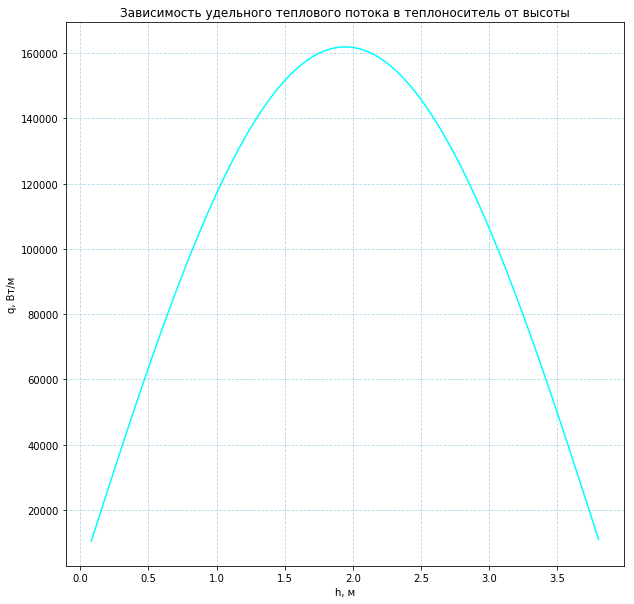

In [100]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.plot(h, q_v, color='cyan')
ax.set_xlabel('h, м')
ax.set_ylabel('q, Вт/м')
ax.set_title('Зависимость удельного теплового потока в теплоноситель от высоты')
ax.grid(color='lightblue', linestyle='--');

## <center> Температура теплоносителя вокруг твела

Расход теплоносителя на одни твел расчитывается по формлу:
$$g_T = \frac{G_r K_r}{n_{твс}n_{твел}} = \frac{Q_T K_r}{C_p (T_{вых}-T_{вх}) n_{твс}n_{твел}}$$
$$K_r = 1.45$$

In [101]:
g_t = Q_t*1.45/(Cp*(T_out-T_in)*n_tvs*n_tvel)

$$q_h dh= g_T C_p dT$$
$$T_т = T_{вх} + A(\cos{\frac{\pi \Delta}{H^*}}-\cos{\frac{\pi h_{твела}}{H^*}})$$

In [102]:
def t_water_dep_h(x):
    A = q_hmax*H_eff/(math.pi*g_t*Cp)
    return T_in+A*(math.cos(math.pi*delta/H_eff)-math.cos(math.pi*x/H_eff))

In [103]:
Tt = [t_water_dep_h(i) for i in h]

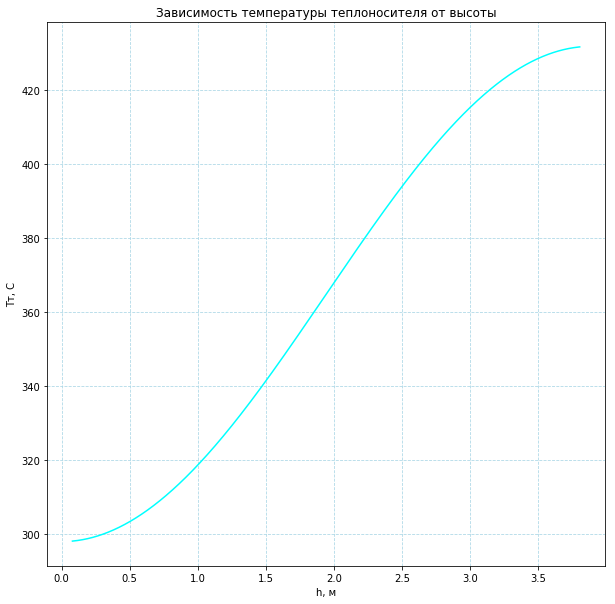

In [104]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.plot(h, Tt, color='cyan')
ax.set_xlabel('h, м')
ax.set_ylabel('Тт, С')
ax.set_title('Зависимость температуры теплоносителя от высоты')
ax.grid(color='lightblue', linestyle='--');

## <center> Температура оболочки твела со стороны теплоносителя

Температура стенки находится на основании уравнения теплоотдачи:
$$T_{ст}^{внеш} = T_т + B^{*} \sin{\frac{\pi h}{H^*}}$$
$$B^{*} = \frac{q_h^{max}}{2\pi r_{ст}^{внеш}\alpha}$$
Коэффициент теплоотдачи можно найти коэффициента Nu:
$$\alpha = \frac{Nu \lambda}{d_{твела}}$$

In [105]:
alpha_out = Nu*lam_st_out/d_tvel

In [106]:
def t_wall_out(x):
    B_stout = q_hmax/(math.pi*alpha_out*d_tvel)
    return t_water_dep_h(x)+B_stout*math.sin(x*math.pi/H_eff)

In [107]:
Tw_out = [t_wall_out(i) for i in h]

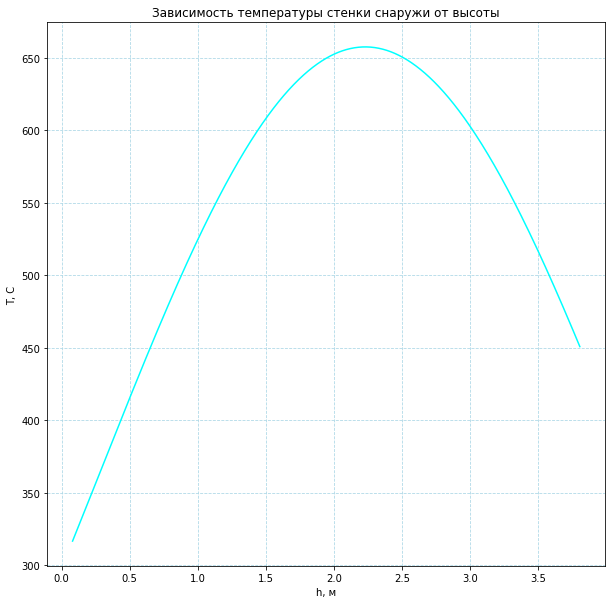

In [108]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.plot(h, Tw_out, color='cyan')
ax.set_xlabel('h, м')
ax.set_ylabel('Т, С')
ax.set_title('Зависимость температуры стенки снаружи от высоты')
ax.grid(color='lightblue', linestyle='--');

## <center> Температура оболочки твела со стороны горючего

В соотвествии с условиями теплопроводности:
$$q_h = \frac{2\pi \lambda_{ст}}{\ln{\frac{r_{ст}^{внеш}}{r_{ст}^{внутр}}}}(T_{ст}^{внутр}-T_{ст}^{внеш})$$
$$T_{ст}^{внутр} = T_{ст}^{внеш} + B^{**} \sin{\frac{\pi h}{H^*}}$$
$$B^{**} = \frac{q_h^{max}}{2\pi \lambda_{ст}} \ln{\frac{r_{ст}^{внеш}}{r_{ст}^{внутр}}}$$

In [109]:
def t_wall_in(x):
    B_stin = q_hmax/(math.pi*lam_st_in*2)*math.log(d_tvel/d_g)
    return t_wall_out(x)+B_stin*math.sin(x*math.pi/H_eff)

In [110]:
Tw_in = [t_wall_in(i) for i in h]

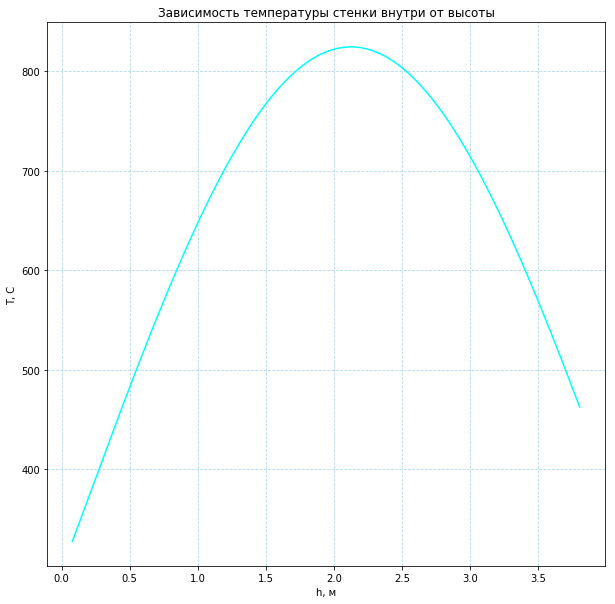

In [111]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.plot(h, Tw_in, color='cyan')
ax.set_xlabel('h, м')
ax.set_ylabel('Т, С')
ax.set_title('Зависимость температуры стенки внутри от высоты')
ax.grid(color='lightblue', linestyle='--');

## <center> Температурный режим горючего

$$T_{г} = T_{ст}^{внутр} + B^{***} \sin{\frac{\pi h}{H^*}}$$
$$ B^{***}=\frac{q_h^{max}}{4\pi \lambda_г}$$

In [112]:
def t_fuel(x):
    B_fuel = q_hmax/(4*math.pi*lam_fuel)
    return t_wall_in(x)+B_fuel*math.sin(x*math.pi/H_eff)

In [113]:
Tfuel = [t_fuel(i) for i in h]

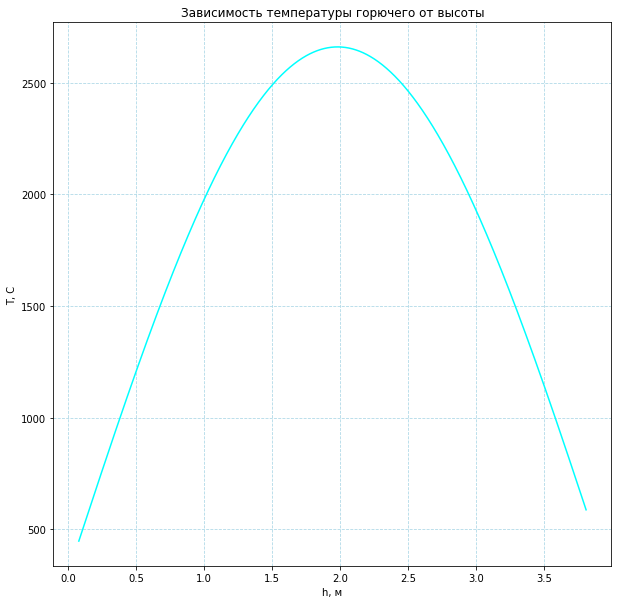

In [114]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.plot(h, Tfuel, color='cyan')
ax.set_xlabel('h, м')
ax.set_ylabel('Т, С')
ax.set_title('Зависимость температуры горючего от высоты')
ax.grid(color='lightblue', linestyle='--');

## <center> Итоги

In [115]:
init_notebook_mode(connected=True)

In [116]:
trace_Tt = Scatter(
    x = h,
    y = np.log(Tt),
    name = 'Теплоноситель',
    line = dict(
        color = ('rgb(0, 155, 127)'),
        width = 3
    )
)

trace_Tout = Scatter(
    x = h,
    y = np.log(Tw_out),
    name = 'Внешняя поверхность оболочки твела',
    line = dict(
        color = ('rgb(218, 150, 94)'),
        width = 3
    )
)

trace_Tin = Scatter(
    x = h,
    y = np.log(Tw_out),
    name = 'Внутренняя поверхность оболочки твела',
    line = dict(
        color = ('rgb(240, 88, 37)'),
        width = 3
    )
)

trace_Tfuel = Scatter(
    x = h,
    y = np.log(Tfuel),
    name = 'Ядерное топливо',
    line = dict(
        color = ('rgb(255, 21, 21)'),
        width = 3
    )
)

data = [trace_Tt, trace_Tout, trace_Tin, trace_Tfuel]

layout = dict(title='Температурный режим твела(логарифмический маштаб)',
              xaxis = dict(title = 'h, м'),
              yaxis = dict(title = 'Т, С'),
              autosize=False,
              width=800,
              height=800,
             )

fig = dict(data=data, layout=layout)
iplot(fig, filename='Температурный режим твела')